# Exploring Relationship

## This script contains the following:
### 1. Importing Visualization Libraries and Data
### 2. Data Check 
### 3. Exploring Relationships
   Correlations
   Scatterplots
   Pair Plots
   Categorical Plots
### 4. Export Data and Visualization.

### 01. Importing Visualization Libraries and data 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# Enable visualizations without calling them.
%matplotlib inline

In [4]:
# Define path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [5]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_cleaned.csv'), index_col = False)

### 02. Data Check

In [7]:
# Checking the shape of imported data.
df.shape

(9301, 12)

In [8]:
# Checking data type
df.dtypes

Unnamed: 0                       int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                      float64
Country                         object
City                            object
dtype: object

In [10]:
# Dropped the column 'Unamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,EUR_price
count,9301.000000,9301.000000,9301.000000,9301.000000,9.301000e+03
mean,2004.912698,11.715313,3.550942,150.495001,3.024185e+05
std,16.384805,5.996365,1.209069,154.877301,9.390165e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03
25%,1999.000000,7.560000,2.550000,70.000000,4.490000e+04
50%,2008.000000,10.490000,3.360000,108.000000,9.500000e+04
75%,2018.000000,14.000000,4.250000,172.000000,2.493420e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


In [12]:
df.head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,3470.48,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,3367.00,Denmark,Svendborg
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
4,Catamaran,none,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3744.00,Switzerland,Neuenburgersee
5,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,none,45,3333.00,Germany,Bayern
6,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,none,180,3300.00,Italy,Dormelletto
7,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3640.00,Switzerland,Seengen
8,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.00,Italy,Lake Garda
9,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4784.00,Switzerland,Zugersee


In [13]:
# Misisng values check.
df.isnull().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

### 03. Exploring Relationships

#### Questions to be Explore:
#### 1.	Which regions in Europe are boats looked at?
#### 2.	characteristics of the most-viewed boat listings in the last 7 days.
#### 3.	Is it the most expensive boat that gets the most views?
#### 4.	Are there common features among the most-viewed boats?


### Correlations Heatmap

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_93839/3302538126.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


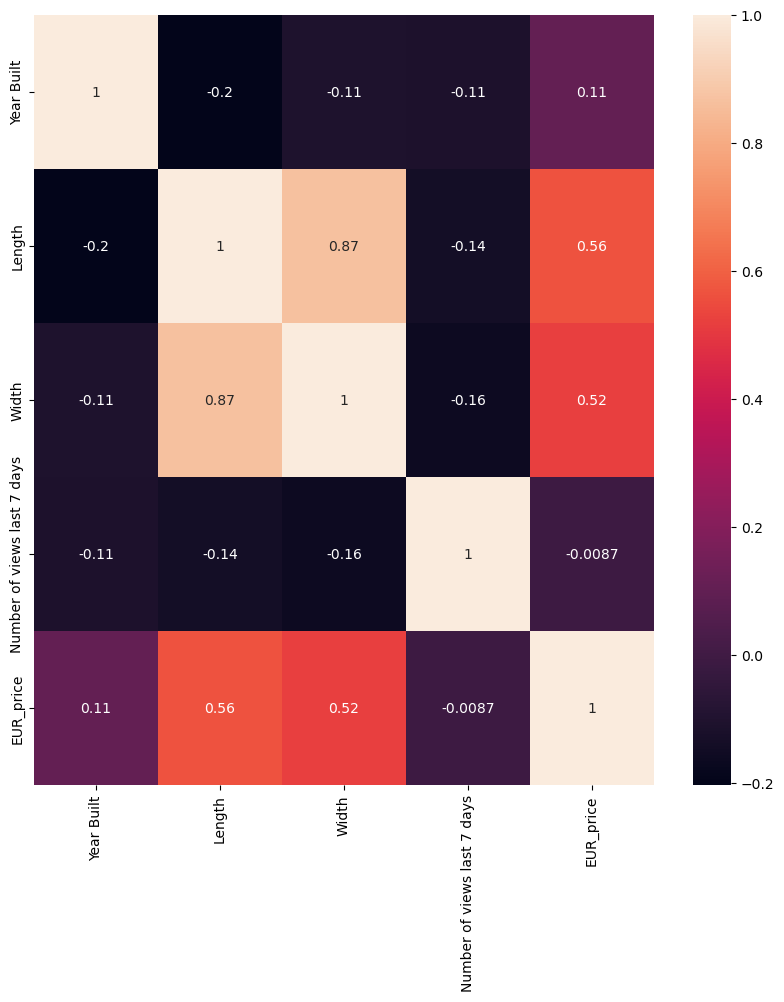

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [16]:
# Exporting Correlations Heatmap.
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr.heatmap.png'))

A correlation heatmap visualises the relationships between different variables in a dataset. In this case, the heatmap shows correlations between 'Price' and other variables.

'Number of Views Last 7 Days' has a weak negative correlation (-0.087) with 'Price,' suggesting that the number of views decreases slightly when the boat prices get slightly higher.
'Year Built' has a positive correlation of 0.11 with 'Price,' indicating a very weak positive relationship. As the year of boat construction increases, the price also tends to increase slightly.
'Length' has a positive correlation of 0.56 with 'Price,' indicating a moderately positive relationship. Longer boats tend to have higher prices.
'Width' has a positive correlation of 0.52 with 'Price,' suggesting a moderately positive relationship. Wider boats also tend to have higher prices.
In summary, the heatmap helps quickly visualise how the 'Price' variable is related to other variables. It confirms a strong positive relationship with 'Length' and 'Width,' and weaker relationships with 'Number of Views Last 7 Days' and 'Year Built.'

### Scatterplots

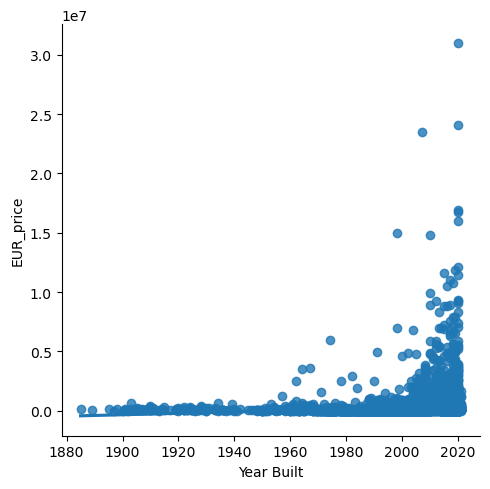

In [18]:
# Create a scatterplot for the "Year Built" and "Eur_price" columns in seaborn

Sctplt_1 = sns.lmplot(x = 'Year Built', y = 'EUR_price', data = df)
# The newer the boat the higher the price.

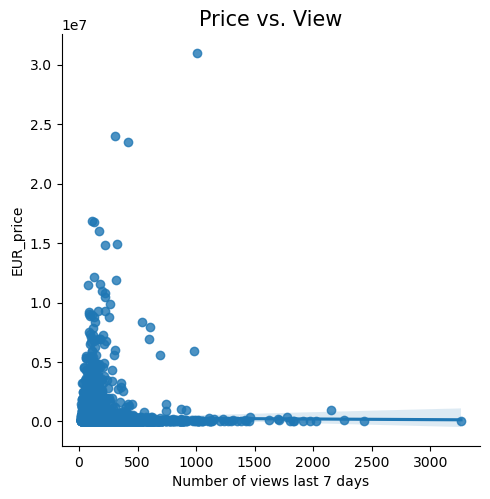

In [21]:
# Create a scatterplot for the "Number of views last 7 days" vs. "EUR_price" columns in seaborn

splot_2 = sns.lmplot(x = 'Number of views last 7 days', y = 'EUR_price', data = df)
plt.title('Price vs. View', size=15);
# Higher-priced boats do not necessarily get more views.

Text(0.5, 1.0, 'Price vs. Length')

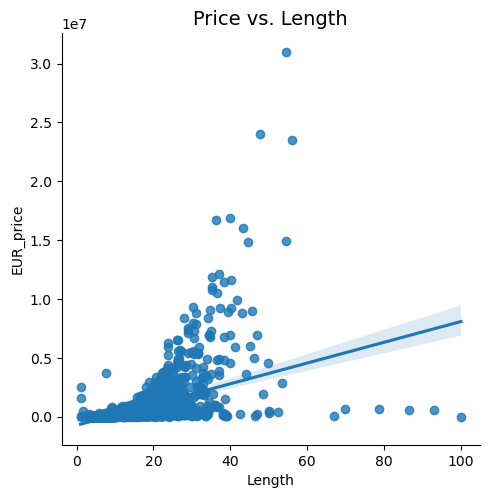

In [22]:
# Create a scatterplot for the "Length" vs. "EUR_price" columns in seaborn

splot_length = sns.lmplot(x = 'Length', y = 'EUR_price', data = df)
plt.title('Price vs. Length', size=14)
# Longer boats tend to have higher prices.

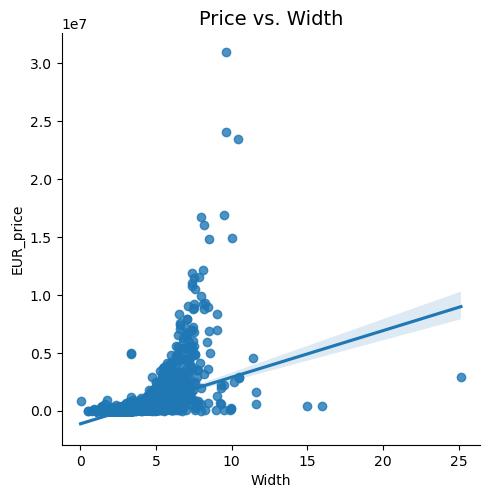

In [23]:
# Create a scatterplot for the "Width" and "EUR_price" columns in seaborn

splot_width = sns.lmplot(x = 'Width', y = 'EUR_price', data = df)
plt.title('Price vs. Width', size=14);
# Wider boats also tend to have higher prices.

Text(0.5, 1.0, 'Year Built vs. Views')

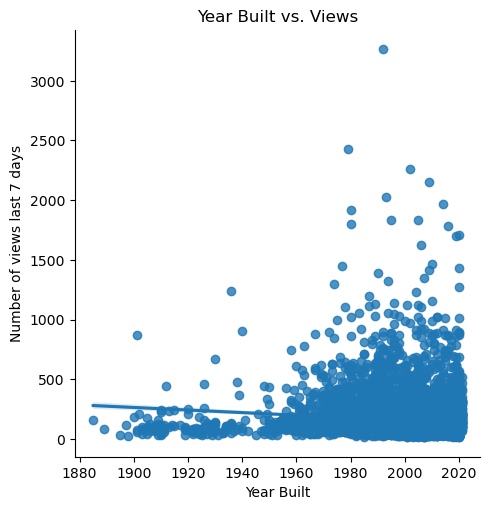

In [27]:
# Plot 'Year Built' vs. 'Number of views last 7 days'
splot_2 = sns.lmplot(x='Year Built', y='Number of views last 7 days', data =df)
plt.title('Year Built vs. Views')
# The number of boats built after 1950 is higher than before 1950.
#Other than the few exceptions where boats built before 1950 get a high number of views,
#generally boats built after 1950 get higher views.

In [28]:
# Exporting the scatterplots visuals.
Sctplt_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_yearbuilt.png'))

In [30]:
# Exporting the scatterplots visuals.
splot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_views.png'))

In [31]:
# Exporting the scatterplots visuals.
splot_length.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Length.png'))

In [32]:
# Exporting the scatterplots visuals.
splot_width.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Width.png'))

### Create Pair plots

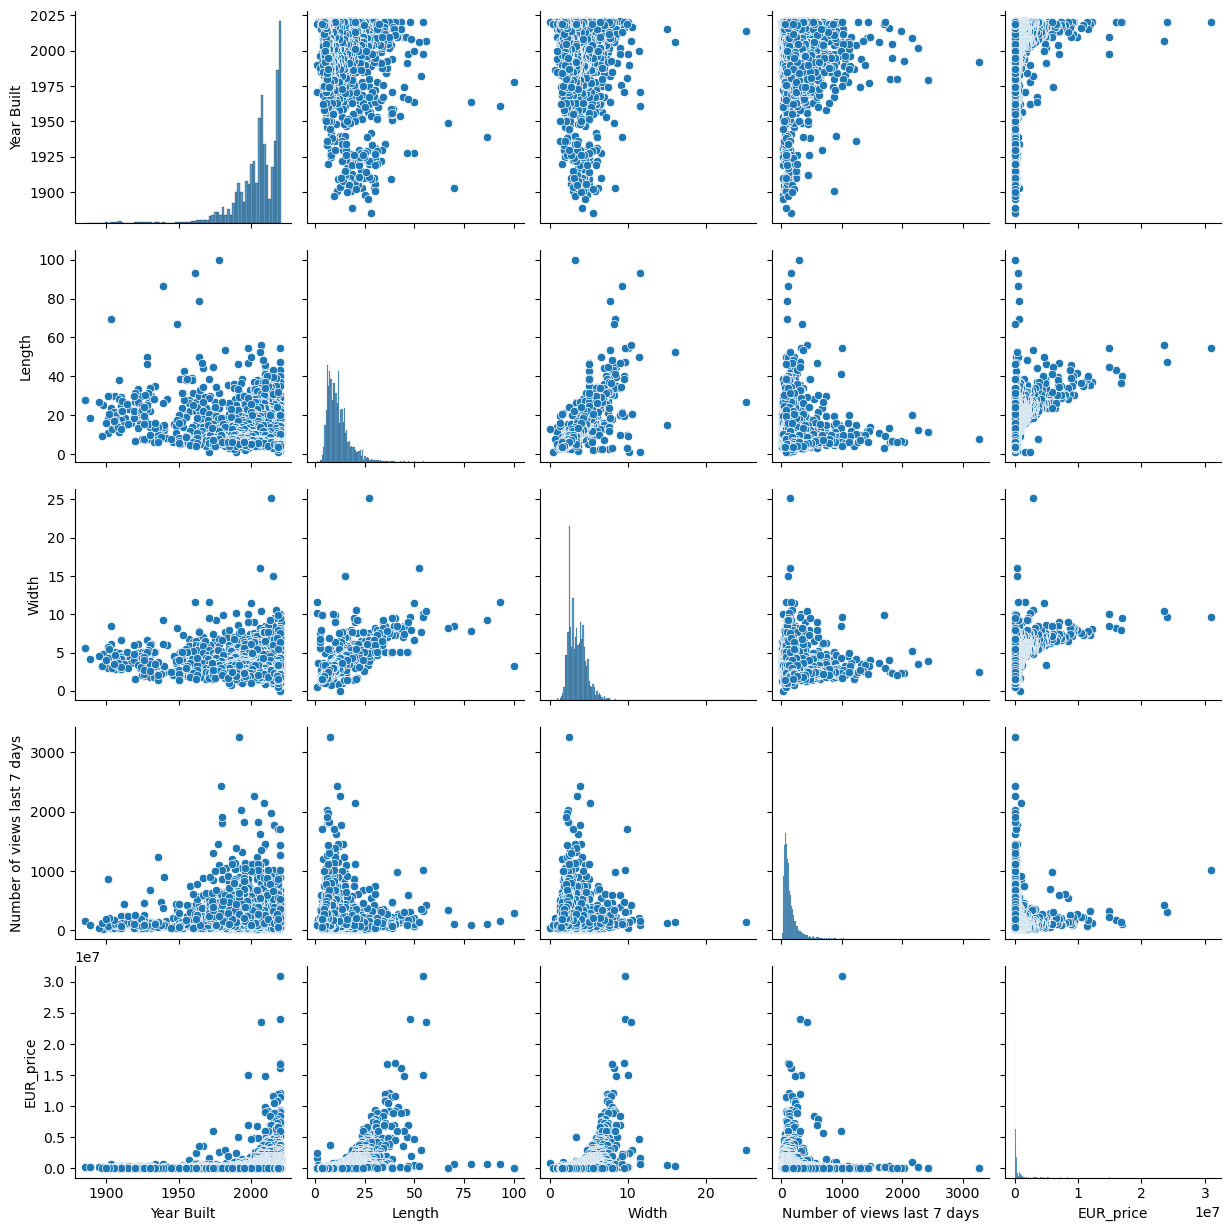

In [33]:
# Creating a pair plot of entire dataset.
g = sns.pairplot(df)

In [34]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

A pair plot depicts the relationship between the variables 'Price,' 'Number of Views Last 7 Days,' 'Year Built,' 'Length,' and 'Width.'

The link between 'Price' and 'Number of Views Last 7 Days' is dispersed, with no apparent linear association, showing that the number of views does not substantially predict the price.

'Price' vs. 'Year Built' displays a dispersed pattern with a minor upward trend, indicating a weak positive link between boat age and price.

'Price' vs. 'Length' shows a sharper rising trend, demonstrating that as the length of the boat grows, so does the price.

'Price' vs. 'width' shows a similar rising trend, indicating that broader boats are often more expensive.
The pair plot illustrates the connections between 'Price' and the other variables. It reveals that 'Length' and 'Width' are more positively associated with 'Price,' whereas 'Number of Views Last 7 Days' and 'Year Built' are less positively associated.

### Catogorical Plots

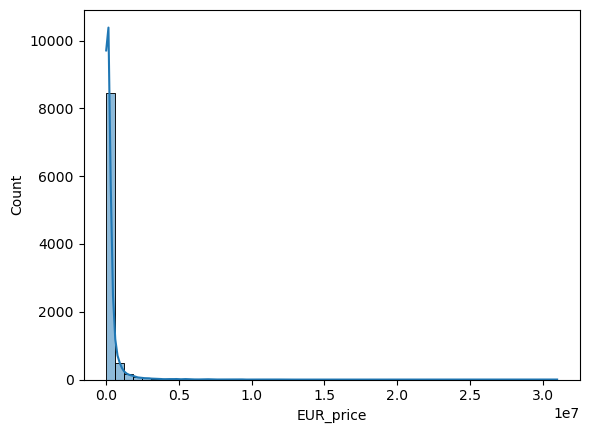

In [35]:
# create a histogram of 'EUR_price' column to see the distribution.
hist_dis = sns.histplot(df['EUR_price'], bins = 50, kde = True)

In [36]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,EUR_price
count,9301.000000,9301.000000,9301.000000,9301.000000,9.301000e+03
mean,2004.912698,11.715313,3.550942,150.495001,3.024185e+05
std,16.384805,5.996365,1.209069,154.877301,9.390165e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03
25%,1999.000000,7.560000,2.550000,70.000000,4.490000e+04
50%,2008.000000,10.490000,3.360000,108.000000,9.500000e+04
75%,2018.000000,14.000000,4.250000,172.000000,2.493420e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


In [37]:
# Checking the max, min and mean of EUR_price column.
minimum_price = df['EUR_price'].min()
maximum_price = df['EUR_price'].max()
mean_price = df['EUR_price'].mean()

print(f"Minimum EUR Price: {minimum_price}")
print(f"Maximum EUR Price: {maximum_price}")
print(f"Mean EUR Price: {mean_price}")

Minimum EUR Price: 3300.0
Maximum EUR Price: 31000000.0
Mean EUR Price: 302418.4556531556


In [39]:
# Creating listing price categories
df.loc[df['EUR_price'] <50000, 'Pricing Category'] = 'Low-priced'
df.loc[(df['EUR_price'] >=50000) & (df['EUR_price'] <=100000), 'Pricing Category'] = 'Mid-Priced'
df.loc[df['EUR_price'] >100000, 'Pricing Category'] = 'High-Priced'

In [40]:
df['Pricing Category'].value_counts(dropna=False)

High-Priced    4429
Low-priced     2697
Mid-Priced     2175
Name: Pricing Category, dtype: int64

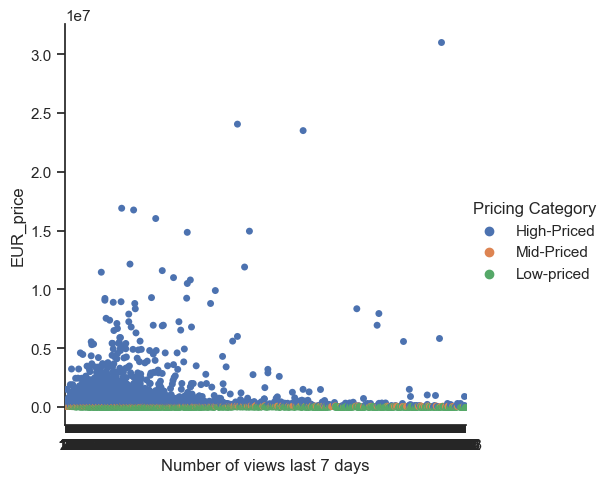

In [45]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Number of views last 7 days", y="EUR_price", hue="Pricing Category", data=df)

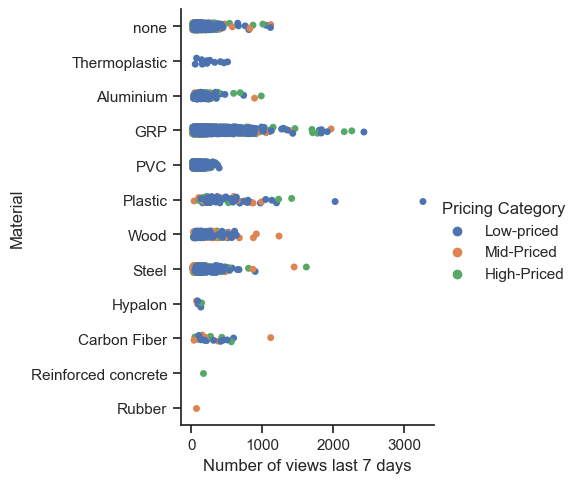

In [46]:
# Creating a categorical plot crossing the number of views with Boat Material
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='Material', hue = 'Pricing Category', data = df)

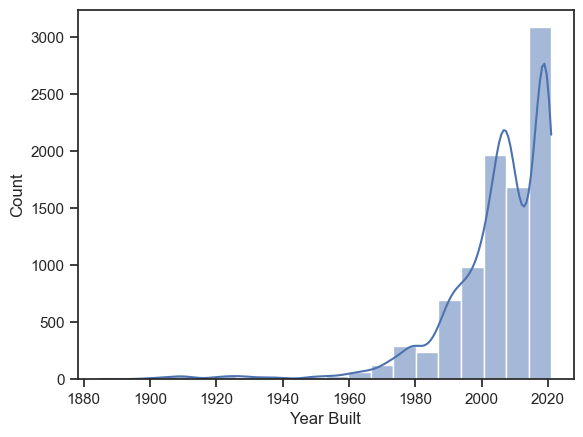

In [48]:
# Create a histogram of 'Year Built' coulm to see the distribution.
hist_dis2 = sns.histplot(df['Year Built'], bins = 20, kde = True)

In [49]:
# Creating 'Year Built' category 
df.loc[df['Year Built'] > 2020, 'Age Range'] = 'New Boat'
df.loc[(df['Year Built'] >= 2000) & (df['Year Built'] <= 2020), 'Age Range'] = 'Used Boat'
df.loc[df['Year Built'] < 2000, 'Age Range'] = 'Vintage Boat'

In [50]:
df['Age Range'].value_counts(dropna=False)

Used Boat       6871
Vintage Boat    2377
New Boat          53
Name: Age Range, dtype: int64

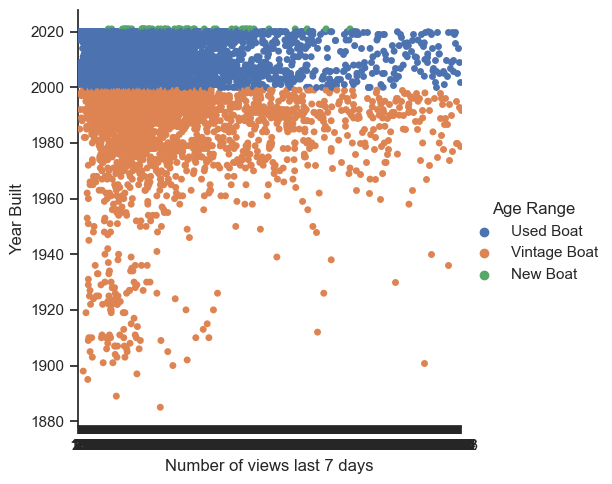

In [52]:
# Creating a categorical plot in seaborn using 'Age Range' category created above.
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='Year Built', hue = 'Age Range', data = df)

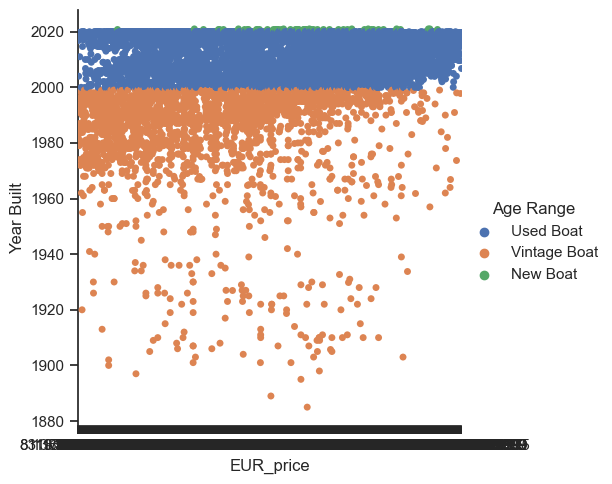

In [53]:
# Creating a categorical plot in seaborn using 'Age Range' category created above.
sns.set(style='ticks')
g = sns.catplot(x='EUR_price', y='Year Built', hue = 'Age Range', data = df)

Text(0.5, 1.0, 'Average views last 7 days per Price Category')

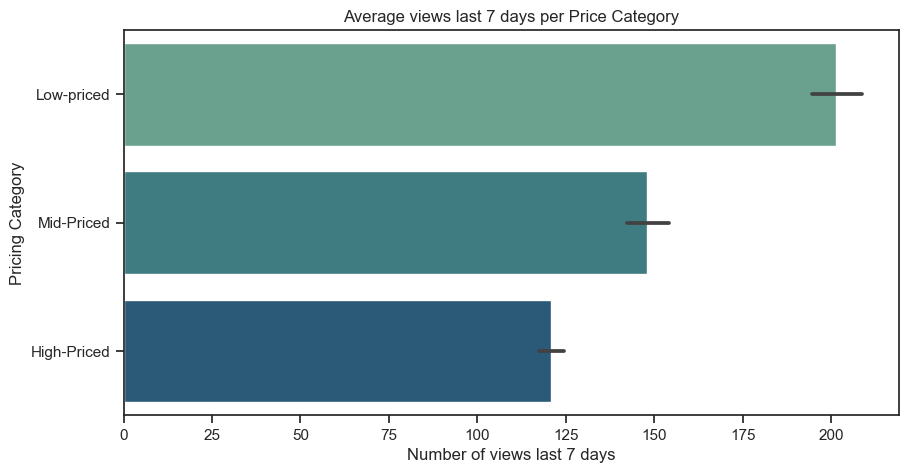

In [56]:
# Creating barchart for Price category with views.
fig = plt.figure(figsize=(10,5) )

bar_1 = sns.barplot(y = 'Pricing Category', x = 'Number of views last 7 days', data = df,
                 palette = 'crest')

plt.title('Average views last 7 days per Price Category')

Text(0.5, 1.0, 'Age Range & Price')

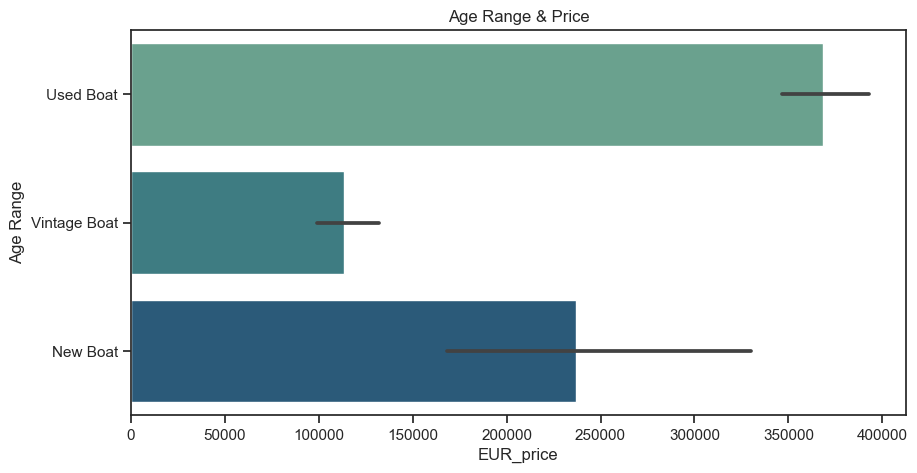

In [57]:
# creating bar chart of Age Range and Price of the boat.
fig = plt.figure(figsize=(10,5) )

bar_2 = sns.barplot(x = 'EUR_price', y = 'Age Range', data = df,
                 palette = 'crest')

plt.title('Age Range & Price')

Text(0.5, 1.0, 'Average views last 7 days per Age Range')

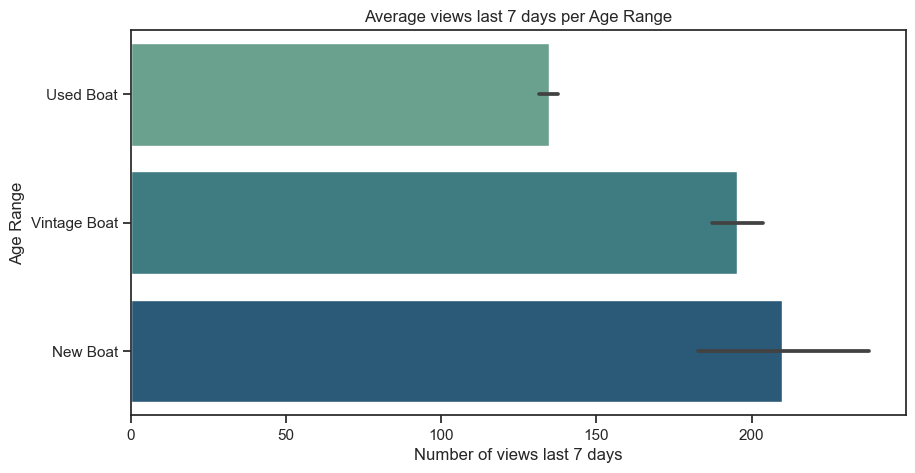

In [58]:
# Creating the bar chart for Age Range and Views.
fig = plt.figure(figsize=(10,5) )

bar_3 = sns.barplot(y = 'Age Range', x = 'Number of views last 7 days', data = df,
                 palette = 'crest')

plt.title('Average views last 7 days per Age Range')


#### Questions to be Explore:
1.	Which regions in Europe are boats looked at?
2.	characteristics of the most-viewed boat listings in the last 7 days.
3.	Is it the most expensive boat that gets the most views?
4.	Are there common features among the most-viewed boats?

#### Is it the most expensive boat that gets the most views?
The answer is No, the data shows that the most expensive boats do not necessarily get the most views.

### 04. Export Data and Visualizations.

In [59]:
# Export the visuals
hist_dis.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_Price.png'))

In [60]:
# Export the visuals
hist_dis2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_yearbuilt.png'))

In [61]:
# Export the visuals
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Veiw_price.png'))

In [62]:
# Export the visuals
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_range_price.png'))

In [63]:
# Export the visuals
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'view_age_range.png'))

In [64]:
# fig = g.get_figure()
g.savefig("out.png") 


In [65]:
# Exporting "df" dataframe as "df_boats_explored.csv"
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_explored.csv'))